In [11]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web

In [12]:
style.use('ggplot')
plt.rcParams['figure.figsize'] = [10, 5]
start = dt.datetime(2015,1,1)
end = dt.datetime.now()

In [13]:
df = web.DataReader('TSLA', 'yahoo', start, end)
print(df.head())

                  High         Low        Open       Close   Volume  \
Date                                                                  
2015-01-02  223.250000  213.259995  222.869995  219.309998  4764400   
2015-01-05  216.500000  207.160004  214.550003  210.089996  5368500   
2015-01-06  214.199997  204.210007  210.059998  211.279999  6261900   
2015-01-07  214.779999  209.779999  213.350006  210.949997  2968400   
2015-01-08  213.800003  210.009995  212.809998  210.619995  3442500   

             Adj Close  
Date                    
2015-01-02  219.309998  
2015-01-05  210.089996  
2015-01-06  211.279999  
2015-01-07  210.949997  
2015-01-08  210.619995  


In [14]:
print(df.index)

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2020-01-06', '2020-01-07', '2020-01-08', '2020-01-09',
               '2020-01-10', '2020-01-13', '2020-01-14', '2020-01-15',
               '2020-01-16', '2020-01-17'],
              dtype='datetime64[ns]', name='Date', length=1270, freq=None)


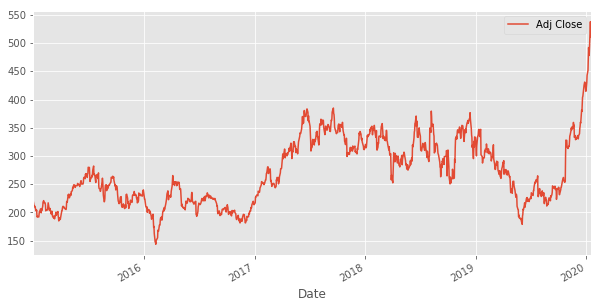

In [15]:
df[['Adj Close']].plot()
plt.show()

In [16]:
df['100ma'] = df['Adj Close'].rolling(window=100, min_periods=0).mean()
print(df.head())

                  High         Low        Open       Close   Volume  \
Date                                                                  
2015-01-02  223.250000  213.259995  222.869995  219.309998  4764400   
2015-01-05  216.500000  207.160004  214.550003  210.089996  5368500   
2015-01-06  214.199997  204.210007  210.059998  211.279999  6261900   
2015-01-07  214.779999  209.779999  213.350006  210.949997  2968400   
2015-01-08  213.800003  210.009995  212.809998  210.619995  3442500   

             Adj Close       100ma  
Date                                
2015-01-02  219.309998  219.309998  
2015-01-05  210.089996  214.699997  
2015-01-06  211.279999  213.559998  
2015-01-07  210.949997  212.907497  
2015-01-08  210.619995  212.449997  


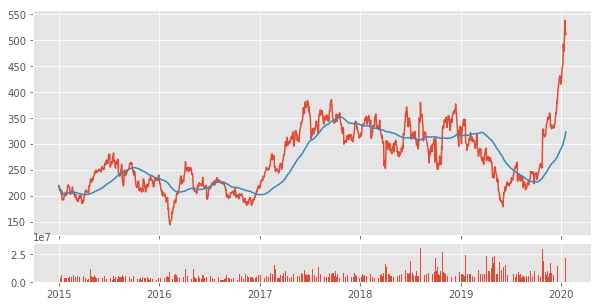

In [17]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1,sharex=ax1)
ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])

plt.show()

In [18]:
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()

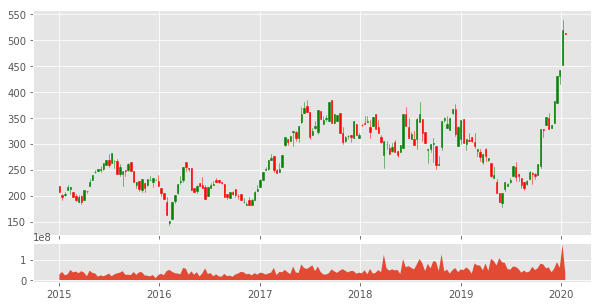

In [19]:
df_ohlc.reset_index(inplace=True)
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)


fig = plt.figure()
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1,sharex=ax1)
ax1.xaxis_date()


candlestick_ohlc(ax1, df_ohlc.values, width=5, colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)
plt.show()